Mean Squared Error: 3.61


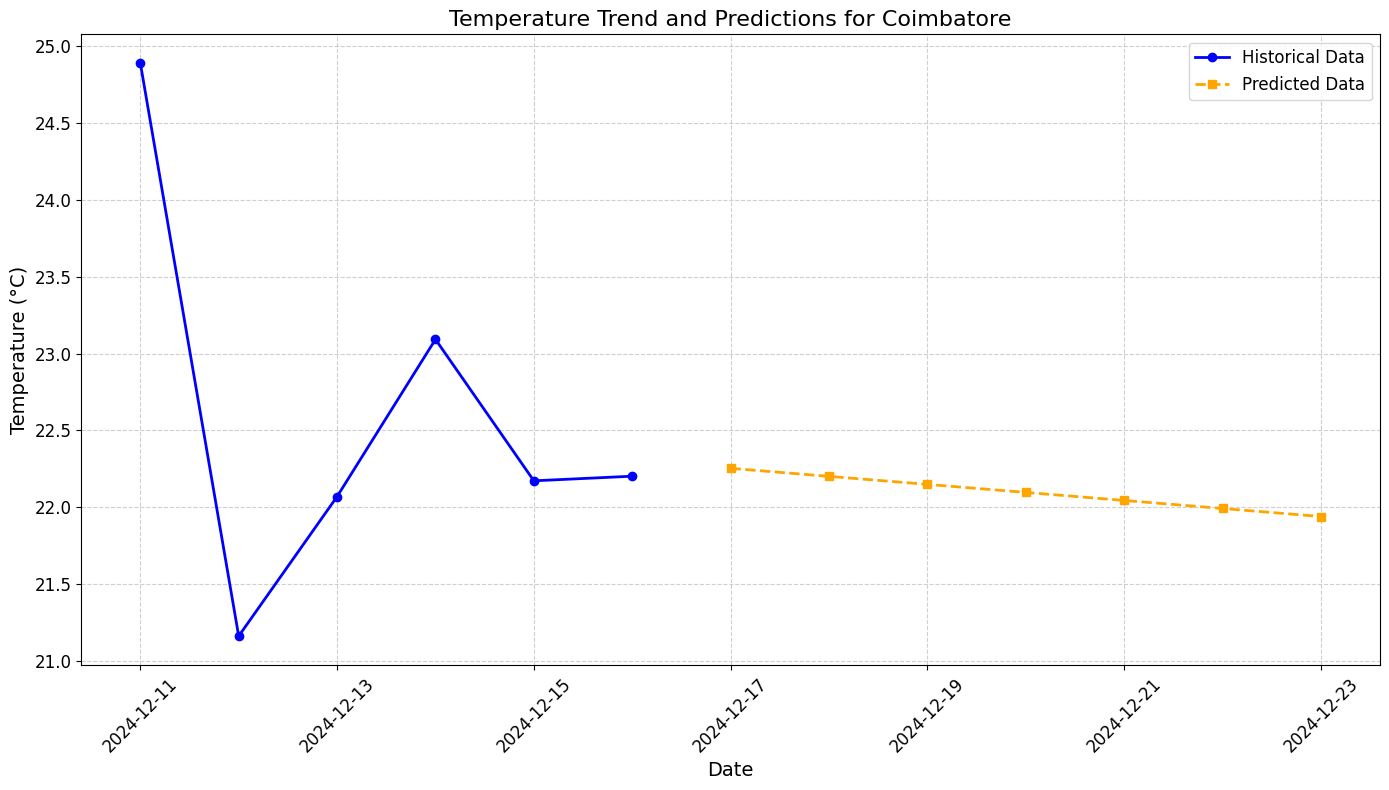

Conclusion: The model predicts a decreasing trend in temperatures over the next 7 days, starting from 22.25°C to 21.94°C.


In [ ]:
#Project_for_Million_Genius_Coders

import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

api_key = '2f3b2634987054cf3a41f439530e21aa'
city = 'Coimbatore'

url = f'https://api.openweathermap.org/data/2.5/forecast?q={city}&appid={api_key}&units=metric'
response = requests.get(url)
data = response.json()

if response.status_code == 200:

    dates = []
    temperatures = []

    for day in data['list']:
        date = pd.to_datetime(day['dt'], unit='s')
        temp = day['main']['temp']
        dates.append(date)
        temperatures.append(temp)


    df = pd.DataFrame({
        'Date': dates,
        'Temperature': temperatures
    })


    df = df.set_index('Date').resample('D').mean().reset_index()
    df['Temperature'] = df['Temperature'].interpolate()


    df['Day'] = (df['Date'] - df['Date'].min()).dt.days


    X = df[['Day']]
    y = df['Temperature']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    model = LinearRegression()
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")


    future_days = pd.DataFrame({'Day': range(df['Day'].max() + 1, df['Day'].max() + 8)})
    future_temps = model.predict(future_days)


    plt.figure(figsize=(14, 8))


    plt.plot(df['Date'], df['Temperature'], label='Historical Data', marker='o', linestyle='-', color='blue', linewidth=2)


    future_dates = pd.date_range(start=df['Date'].max() + pd.Timedelta(days=1), periods=7)
    plt.plot(future_dates, future_temps, label='Predicted Data', marker='s', linestyle='--', color='orange', linewidth=2)


    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Temperature (°C)', fontsize=14)
    plt.title(f'Temperature Trend and Predictions for {city}', fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


    temp_trend = "increasing" if future_temps[-1] > future_temps[0] else "decreasing"
    print(f"Conclusion: The model predicts a {temp_trend} trend in temperatures over the next 7 days, starting from {future_temps[0]:.2f}°C to {future_temps[-1]:.2f}°C.")
else:
    print(f"Error: API request failed with status code {response.status_code}. Check your API key and city name.")
